# Multiple Linear Regression
## Bike-sharing system case study

#### Problem Statement:

Bike-sharing system BoomBikes company that has a dataset containing count of shared bikes. It wishes to use the data to understand the factors (holiday. year, weekday, etc) affecting the demand  for these shared bikes in the American market

Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands



## Step 1 - Reading and understanding the data 

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [3]:
# reading dataset
boombikes = pd.read_csv(r'D:\DataScience\13\day.csv')
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# reading columns in dataset
boombikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
boombikes.shape

(730, 16)

In [7]:
boombikes.dtypes.value_counts()

int64      11
float64     4
object      1
dtype: int64

In [8]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# dropping columns 'instant', 'dteday','casual', 'registered' as they are not of any use for model prediction
boombikes.drop(['instant', 'dteday','casual', 'registered'], axis =1, inplace =True)
boombikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Step 2- Performing EDA 
### Visualising the data
#### 1. Numerical Datatype

In [10]:
# storing numerical columns in boombikes_num
boombikes_num = boombikes[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

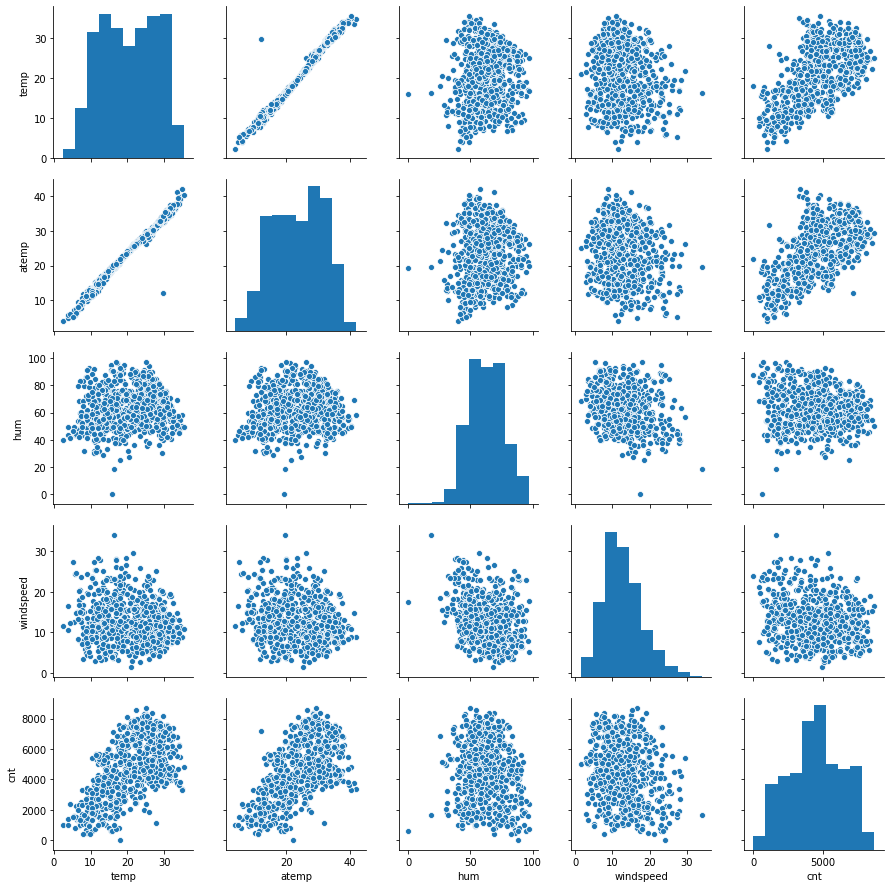

In [11]:
# plotting numerical variables using pairplot
sns.pairplot(boombikes_num)
plt.show()

- temp and atemp is highly correlated, which will create a multicolinearity problem, so while data prepartion we will drop one of them using VIF technique

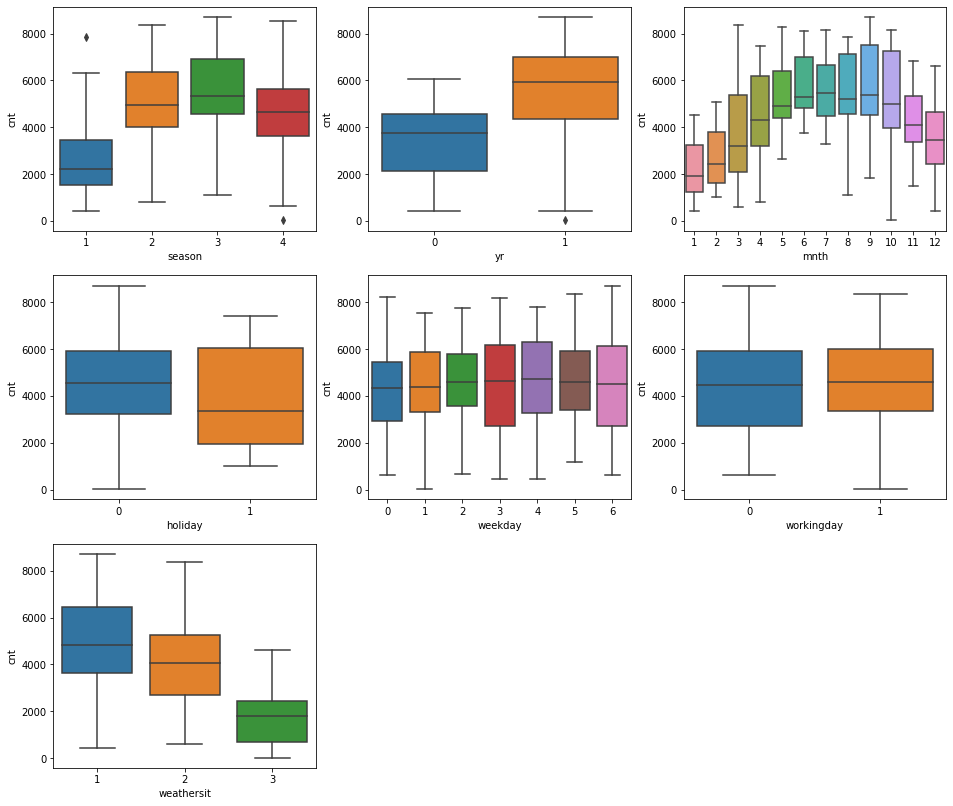

In [12]:
#plotting categorical variables using boxplot
plt.figure(figsize = (16, 14))
plt.subplot(3, 3, 1)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes)
plt.subplot(3, 3, 2)
sns.boxplot(x = 'yr', y = 'cnt', data = boombikes)
plt.subplot(3, 3, 3)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes)
plt.subplot(3, 3, 4)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombikes)
plt.subplot(3, 3, 5)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes)
plt.subplot(3, 3, 6)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombikes)
plt.subplot(3, 3, 7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes)
plt.show()

### Interpretation from boxplot

- Average count of total rental bikes is less for spring season, for other seasons it is between 4000-6000
- Average count of total rental bikes has increased in year 2019 as compared to year 2018
- Average count of total rental bikes gradually increase from month 1 till month 7, and then decreases
- Average count of total rental bikes is less for holidays as compared to non-holidays
- While weekdays and workings days have no impact on average count of total rental bikes
- Average count of total rental bikes is higher when weather conditions are (Clear Few clouds, Partly cloudy, Partly cloudy) and it reduces as weather condition gets worse, while there is no any count when weather conditions are (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

## Step 3 - Data Preparation
### Creating dummy variables for categorical datatype

In [13]:
#replacing values 1-4 in season column with season names for better understanding
boombikes.season.replace({1: 'spring', 2: "summer", 3: 'fall', 4: 'winter'}, inplace = True)
boombikes.season.head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [14]:
#replacing values 1-4 in weathersit column with unique names for better understanding
boombikes.weathersit.replace({1: 'ws_1', 2: "ws_2", 3: 'ws_3', 4: 'ws_4'}, inplace = True)
boombikes.weathersit.head()

0    ws_2
1    ws_2
2    ws_1
3    ws_1
4    ws_1
Name: weathersit, dtype: object

In [15]:
#replacing values 0-6 in weekdays column with days name from sun-sat for better understanding
boombikes.weekday.replace({0: 'sunday', 1: "monday", 2: 'tuesday', 3: 'wednesday', 4: 'thursday' , 5: 'friday ', 6: 'saturday' }, inplace = True)
boombikes.weekday.head()

0     saturday
1       sunday
2       monday
3      tuesday
4    wednesday
Name: weekday, dtype: object

In [16]:
#replacing values 1-12 in month column with month name from jan-dec for better understanding
boombikes.mnth.replace({1: "jan", 2: 'feb', 3: 'mar', 4: 'apr' , 5: 'may', 6: 'june', 7: 'july', 8:'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec' }, inplace = True)
boombikes.mnth.head()

0    jan
1    jan
2    jan
3    jan
4    jan
Name: mnth, dtype: object

In [17]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'dummy1' and dropping first column
dummy1 = pd.get_dummies(boombikes['season'], drop_first = True)
dummy1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [18]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'dummy2' and dropping first column
dummy2 = pd.get_dummies(boombikes['weathersit'], drop_first =True)
dummy2.head()

,ws_2,ws_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [19]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'dummy3' and dropping first column
dummy3 = pd.get_dummies(boombikes['weekday'], drop_first = True)
dummy3.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [20]:
# Get the dummy variables for the feature 'month' and store it in a new variable - 'dummy4' adn dropping first column
dummy4 = pd.get_dummies(boombikes['mnth'], drop_first = True)
dummy4.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [21]:
# dropping columns for which we have created dummy variables 
boombikes.drop(['weekday', 'season', 'weathersit','mnth'], axis =1, inplace = True)
boombikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
# concatenating these dummy columns with original dataset boombikes 
boombikes = pd.concat([boombikes, dummy1, dummy2, dummy3, dummy4], axis =1)
boombikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
# reading columns present in newly created dataset
boombikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'ws_2', 'ws_3', 'monday',
       'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday', 'aug', 'dec',
       'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep'],
      dtype='object')

## Step 4 - Splitting data into test and train datset

In [24]:
# splitting data into train and test datase
df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state= 100)

### Feature Scaling - scaling using MinMaxScaler on train ata

In [25]:
scaler = MinMaxScaler()
scaler_vars = ['cnt','temp', 'atemp', 'hum', 'windspeed']
df_train[scaler_vars] = scaler.fit_transform(df_train[scaler_vars])

In [26]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# describing df_train to check scaling results
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and y sets for model building

In [28]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5- Building a linear model

In [29]:
# choosing top 10 variables using RFE technique
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)            
rfe = rfe.fit(X_train, y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('ws_2', False, 2),
 ('ws_3', True, 1),
 ('monday', False, 14),
 ('saturday', False, 4),
 ('sunday', False, 13),
 ('thursday', False, 17),
 ('tuesday', False, 15),
 ('wednesday', False, 18),
 ('aug', False, 12),
 ('dec', False, 8),
 ('feb', False, 9),
 ('jan', False, 6),
 ('july', True, 1),
 ('june', False, 19),
 ('mar', False, 20),
 ('may', False, 11),
 ('nov', False, 7),
 ('oct', False, 16),
 ('sep', True, 1)]

In [31]:
# storing top 10 variables obtained through RFE in col
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'ws_3',
       'july', 'sep'],
      dtype='object')

In [32]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'summer', 'ws_2', 'monday', 'saturday', 'sunday',
       'thursday', 'tuesday', 'wednesday', 'aug', 'dec', 'feb', 'jan', 'june',
       'mar', 'may', 'nov', 'oct'],
      dtype='object')

In [33]:
# creating X_train dataset with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,winter,ws_3,july,sep
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0


In [34]:
# defining a function which will return linear model summary built on X_train and y_train
def linMod(X_train, y_train):
    X_train_lm = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train_lm).fit()
    return lm.summary()

In [35]:
# getting summary for linear model
linMod(X_train_rfe, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.53e-184
Time:                        16:18:22   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3769      0.031     12.133      0.000       0.316       0.438
yr             0.2281      0.008     27.102      0.000       0.212       0.245
holiday       -0.0920      0.026     -3.472      0.001      -0.144      -0.040
temp           0.5147      0.031     16.542      0.000       0.454       0.576
hum           -0.2728      0.032     -8.542      0.000      -0.336      -0.210
windspeed     -0.1887      0.026     -7.194      0.000      -0.240      -0.137
spring        -0.1005      0.015     -6.536      0.000      -0.131      -0.070
winter         0.0653      0.013      5.153      0.000       0.040       0.090
ws_3          -0.1980      0.026     -7.659      0.000      -0.249      -0.147
july          -0.0805      0.018     -4.538      0.000      -0.115      -0.046
sep            0.0598      0.016      3.723      0.000       0.028       0.091
==============================================================================
Omnibus:                       51.023   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.492
Skew:                          -0.593   Prob(JB):                     1.51e-22
Kurtosis:                       4.823   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As p value is less than 0.05 for all the features so we need to check the value of VIF in order to build effective model**

In [36]:
# defining a function which will return VIf value
def VIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [37]:
# getting vif values for X_train_rfe
VIF(X_train_rfe)

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,spring,2.40
0,yr,2.06
6,winter,1.98
8,july,1.40
9,sep,1.20
7,ws_3,1.11
1,holiday,1.04


In [38]:
# dropping 'hum' column as it has high vif value and creating new train set X_train_1
X_train_1 = X_train_rfe.drop('hum', 1)

In [39]:
# checking summary for linear model
linMod(X_train_1, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.33e-171
Time:                        16:18:22   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2042      0.025      8.095      0.000       0.155       0.254
yr             0.2350      0.009     26.233      0.000       0.217       0.253
holiday       -0.0862      0.028     -3.041      0.002      -0.142      -0.030
temp           0.4758      0.033     14.453      0.000       0.411       0.540
windspeed     -0.1325      0.027     -4.879      0.000      -0.186      -0.079
spring        -0.1032      0.016     -6.274      0.000      -0.136      -0.071
winter         0.0504      0.013      3.754      0.000       0.024       0.077
ws_3          -0.2562      0.027     -9.608      0.000      -0.309      -0.204
july          -0.0616      0.019     -3.272      0.001      -0.099      -0.025
sep            0.0498      0.017      2.911      0.004       0.016       0.083
==============================================================================
Omnibus:                       62.894   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.633
Skew:                          -0.736   Prob(JB):                     4.71e-26
Kurtosis:                       4.823   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# checking VIF values for X_train_1 as all variables are having p value less than 0.05
VIF(X_train_1)

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,spring,1.61
5,winter,1.37
7,july,1.34
8,sep,1.20
6,ws_3,1.06
1,holiday,1.04


**p values for above features are less than 0. 05, also VIF values are below 5 so we have got our required features**

## Step 6 -Residual analysis of train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [41]:
# building a linear model with final X_train_1
X_train_lm = sm.add_constant(X_train_1)
lm_r = sm.OLS(y_train, X_train_lm).fit()

In [42]:
# predicting y_train_pred
y_train_pred = lm_r.predict(X_train_lm)

In [43]:
# defining errors as residual
residual = y_train - y_train_pred
residual

653    0.171989
576    0.097397
426   -0.047337
728   -0.160612
482   -0.119446
         ...   
526   -0.020158
578    0.007436
53     0.035420
350   -0.002825
79    -0.117648
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

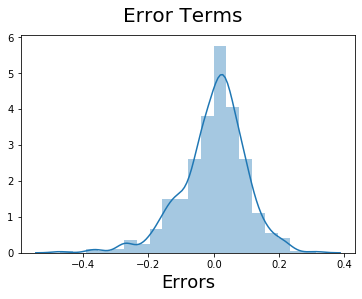

In [44]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)  

#### Normal distrbuton of residual
So, from distplot we can see that error term is normally distributed and avg mean is also zero.

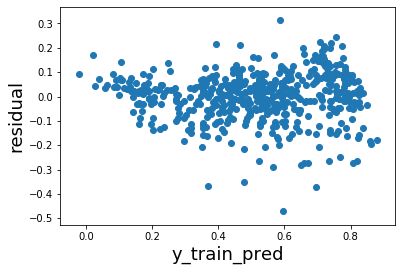

In [45]:
plt.scatter(y_train_pred, residual)
plt.xlabel('y_train_pred', fontsize = 18) 
plt.ylabel('residual', fontsize = 18) 
plt.show()

#### Homoscedasticity(Constant Variance)
So, from plot it is clear that overall distribution is randomly sampled, no relation between residual and y predicted.

## Step 6 - Making model predication

### Scaling using MinMaxScaler on test data set

In [46]:
# scaling using transform 
scaler_vars_t = ['cnt','temp', 'atemp', 'hum', 'windspeed']
df_test[scaler_vars_t] = scaler.transform(df_test[scaler_vars_t])

In [47]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# defining X and y test sets
y_test = df_test.pop('cnt')
X_test = df_test

In [49]:
# creating new X_test with required columns
X_test_new = X_test[X_train_1.columns]
X_test_lm = sm.add_constant(X_test_new)
X_test_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter',
       'ws_3', 'july', 'sep'],
      dtype='object')

In [50]:
# getting predicted value for y_test
y_test_pred = lm_r.predict(X_test_lm)

In [51]:
# calculating r_squared for test data
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7888115946045293

Text(0, 0.5, 'y_test_pred')

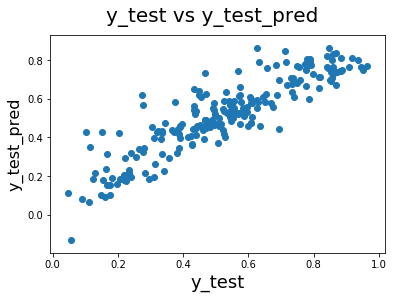

In [52]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                      
plt.ylabel('y_test_pred', fontsize=16)  

In [53]:
# reading coefficient of final features
lm_r.params

const        0.204152
yr           0.234993
holiday     -0.086151
temp         0.475763
windspeed   -0.132479
spring      -0.103199
winter       0.050374
ws_3        -0.256213
july        -0.061646
sep          0.049844
dtype: float64

We can see that the equation of our best fitted line is:

$ count = 0.235 \times year - 0.086 \times holiday + 0.476 \times temp - 0.135 \times windspeed - 0.103 \times spring + 0.050 \times winter - 0.256 \times ws 3 - 0.062 \times july + 0.049 \times sep + 0.204 \times constant $